## Stage 3: Data Processing

### 1. Necessary Imports and Setup

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

randomStateNumber = 1

# Prints the frequency and percentage
def printClassBalance(col):
    col = col.rename(index={0.0: 'Non-Delayed', 1.0: 'Delayed'})   
    class_counts = col.value_counts()
    class_percentages = col.value_counts(normalize=True) * 100
    print(col.shape)
    print(class_counts)
    print(class_percentages)
    plt.figure(figsize=(8, 6))

    bars = plt.bar(['Non Delayed Flight', 'Delayed Flight'], class_percentages, color=['lightblue', 'salmon'])

    # Displaying count numbers on top of each bar
    i = 0
    for rect in bars:
        plt.text(rect.get_x() + rect.get_width() * 0.50,  rect.get_height() * 0.50, str(class_percentages[i]), ha='center')
        i+=1

    plt.title('Percentage Distribution of Delayed vs Non-Delayed Flights')
    plt.xlabel('Total Flights')
    plt.ylabel('Percentage (%)')
    plt.show()

In [198]:
# Read data
df = pd.read_csv('data/cleaned_data.csv')

# Set up all features, categorical and numerical
features = ['Operating_Airline', 'Dest', 'DayOfWeek', 'DayofMonth', 'Distance']
categorical_features = ['Operating_Airline', 'Dest', 'DayOfWeek', 'DayofMonth']
label = "DepDel15"

# Drop NAN values
df.dropna(subset=[label], inplace=True)

# Stripping trailing ends
df.columns = df.columns.str.strip()

df_features = df[features]
df_labels = df[[label]]


C:\Users\compu\AppData\Local\Temp\ipykernel_30036\2937439268.py:2: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/cleaned_data.csv')


### 2. Check for Imbalance in Dataset 

(607969, 1)
DepDel15
0.0         462840
1.0         145129
Name: count, dtype: int64
DepDel15
0.0         76.128882
1.0         23.871118
Name: proportion, dtype: float64


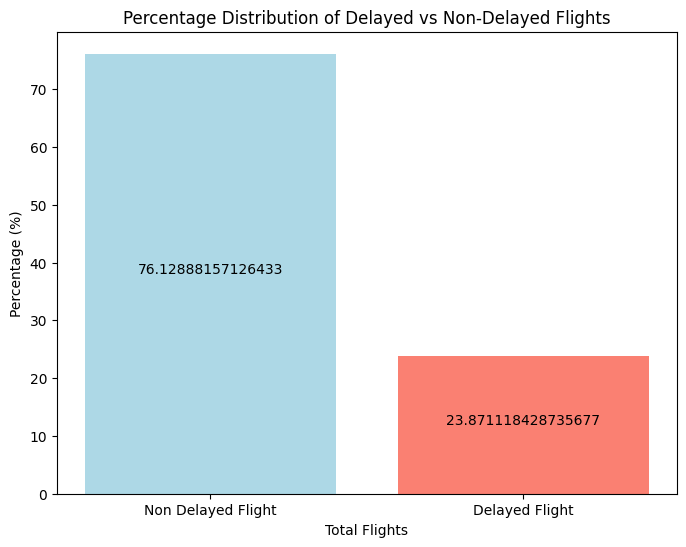

In [199]:
printClassBalance(df_labels)

<div class="alert alert-block alert-warning">
<b>Data set is imbalanced: We observe that 76% of the flights are non-delayed and only 23% of flights are delayed. This could lead to issues with overfitting.</b>
</div>


### 3. Balancing data set via DownSampling (prune majority classes) 

#### To address the imbalanced data set, we employ downsampling technique to prune the majority class. This ensures a balanced data set for our AI models to train on.

(290258,)
DepDel15
1.0    145129
0.0    145129
Name: count, dtype: int64
DepDel15
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


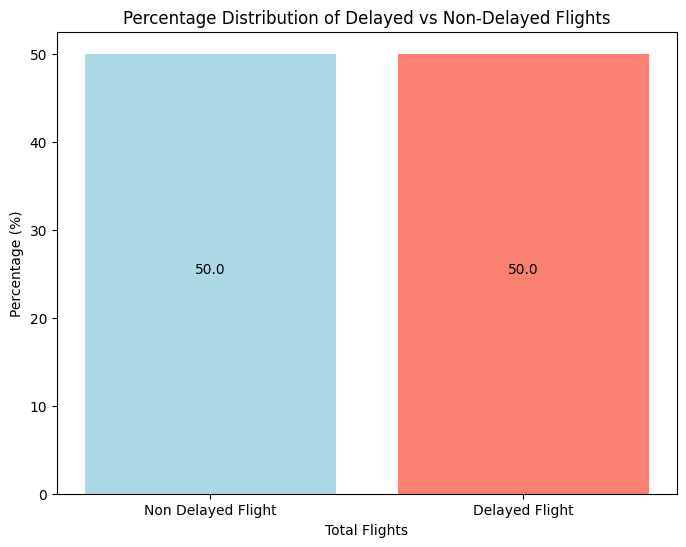

In [200]:
delayed = df[df[label] == 1]
not_delayed = df[df[label] == 0]

# Downsample the majority class ('not_delayed') to match the minority class ('delayed')
not_delayed_downsampled = not_delayed.sample(n=len(delayed), random_state=randomStateNumber)

# Concatenate the downsampled majority class with the minority class
df_downsampled = pd.concat([not_delayed_downsampled, delayed])

# Shuffle the resulting DataFrame to randomize the order of rows
df_downsampled = df_downsampled.sample(frac=1, random_state=randomStateNumber).reset_index(drop=True)

printClassBalance(df_downsampled[label])

<div class="alert alert-block alert-success">
<b>The dataset is now balanced to 50% with 145k entries in delayed and non-delayed by pruning the non-delayed flights.</b>
</div>

### 4. Balancing data set via RandomOversampling (duplicates minority classes)

In [201]:
# ros = RandomOverSampler(random_state=1)
# features_set, labels_set = ros.fit_resample(df_features, df_labels)
# df_upsampled = pd.concat([features_set, labels_set], axis=1)

# printClassBalance(df_upsampled[label])



<div class="alert alert-block alert-warning">
<b>The dataset is now balanced to 50% with 941k entries in delayed and non-delayed by duplcating the delayed flights.</b>
</div>


### 5. One-Hot Encoding Categorical Variables


##### One-hot encoding is used here instead of ordinal encoding to prevent any bias in terms of hierarchy where a larger number is preferred by the AI model.

In [202]:
df_input = df_downsampled

In [203]:
# Before Encoding
df_before = df_input[features + [label]]

# One-hot encode 'category' column
one_hot_encoded = pd.get_dummies(df_input[categorical_features])

# Concatenate one-hot encoded features with original DataFrame
df_combined = pd.concat([df_before, one_hot_encoded], axis=1).drop(columns=categorical_features)

print("Before Encoding Columns: ", df_before.shape)
print("After Encoding Columns: ", df_combined.shape)

Before Encoding Columns:  (290258, 6)
After Encoding Columns:  (290258, 391)


<div class="alert alert-block alert-success">
<b>    The 5 columns has been hot-encoded into 390 columns.</b>
</div>


### 6. Exporting CSV

In [204]:
df_combined.to_csv('data/processed_data_downsampled.csv', index=False)